<a href="https://colab.research.google.com/github/Nagano11/linear_regression_basics/blob/main/Linear_Regression_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Linear Regression </h1>

# <font color='red' style='font-size: 30px;'>Getting to know the Dataset</font>
<hr style='border: 2px solid red;'>

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Dataset and the Project
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Our goal in this exercise is to create a machine learning model using a Linear Regression technique that is able to predict the price a property from a set of its characteristics.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>We are using a dataset avaliable in Kaggle which was generated by a CPU for machine learning training for begginers. This dataset was modified in order to facilitate our goal, which is to fixate the aquired knowledge of a Linear Regression in Alura courses.</p>

### Data:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>prices</b> - Property's price</li>
    <li><b>area</b> - Property's area</li>
    <li><b>garage</b> - Number of parking spaces</li>
    <li><b>bathroom</b> - Number of bathrooms</li>
    <li><b>fireplace</b> - Number of fireplaces</li>
    <li><b>marble</b> - If the property has white marble in it (1) or not (0)</li>
    <li><b>floor</b> - If the property has mode than one floor (1) or not (0)</li>
</ul>

## Loading the dataset

In [5]:
data = pd.read_csv('HousePrices_HalfMil.csv', sep=';')

## Visualizing the dataset

In [6]:
data.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Translating the dataset from portuguese to english

In [7]:
data.columns

Index(['precos', 'area', 'garagem', 'banheiros', 'lareira', 'marmore',
       'andares'],
      dtype='object')

In [8]:
column_names = {'precos':'price', 
                'garagem':'garage', 
                'banheiros':'bathroom', 
                'lareira':'fireplace', 
                'marmore':'marble',
                'andares':'floors'}

data.rename(columns=column_names, inplace=True)

In [9]:
data.head()

,price,area,garage,bathroom,fireplace,marble,floors
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verifying the dataset size

In [10]:
data.shape

(1000, 7)

## Checking the quality of the data

In [11]:
data.count()

price        1000
area         1000
garage       1000
bathroom     1000
fireplace    1000
marble       1000
floors       1000
dtype: int64

# <font color='red' style='font-size: 30px;'>Preliminary Analysis</font>
<hr style='border: 2px solid red;'>

## Descriptive statistics

In [12]:
data.describe().round(2)

,price,area,garage,bathroom,fireplace,marble,floors
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Correlation matrix

In [13]:
data.corr().round(2)

,price,area,garage,bathroom,fireplace,marble,floors
price,1.00,0.12,0.10,0.12,0.11,0.43,0.63
area,0.12,1.00,-0.01,-0.01,0.01,-0.02,-0.02
garage,0.10,-0.01,1.00,0.07,0.06,-0.02,-0.02
bathroom,0.12,-0.01,0.07,1.00,0.05,-0.03,-0.02
fireplace,0.11,0.01,0.06,0.05,1.00,0.03,-0.00
marble,0.43,-0.02,-0.02,-0.03,0.03,1.00,-0.01
floors,0.63,-0.02,-0.02,-0.02,-0.00,-0.01,1.00


What are the most correlated variables with the dependant variable (Price)?

A-> Floor with a correlation of 0.63 and marble in second with a correlation of 0.43. 

What is the relation between them (positive or negative)?

A-> They are all positive relationship.

Are there any strong correlation between the explanatory variables?

A-> No, the relation between them are very low. 

# <font color='red' style='font-size: 30px;'>Behaviour analysis of dependent variable (Y)</font>
<hr style='border: 2px solid red;'>

# Graph analysis

## Box plot of *dependent* variable (y)

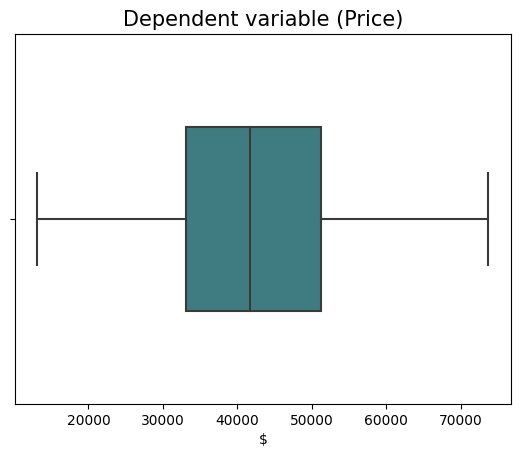

In [14]:
ax = sns.boxplot(data, x='price', width=0.5, palette='crest')
ax.set_title('Dependent variable (Price)', fontsize=15)
ax.set_xlabel('$')
ax = ax

Does it seem to have any outiers ?

A-> The above box plot doesn't show any outliers.

Does the box plot present any tendencies?

A-> No, the box plot mostly seems symmetric, and a little positively skewed which we can see that there are a little more than half of the houses are above the mean (41,985.60).

## Investigating *dependent* variable (y) along with other characteristics

### Box-plot (Price X Garage)

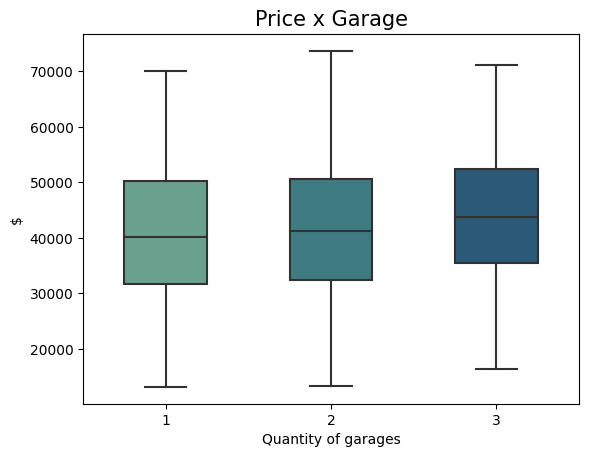

In [15]:
ax = sns.boxplot(data, x='garage', y='price', width=0.5, palette='crest')
ax.set_title('Price x Garage', fontsize=15)
ax.set_xlabel('Quantity of garages')
ax.set_ylabel('$')
ax=ax

The explanatory variable, garage, doesn't seem to have effects towards the house's price. Houses with 1 and 2 garages shows the same behavior whereas the houses with 3 garages shows a little higher prices.

It is alligned with the Pearson's correlation presented before, where the coefficient between price and garage is 0.10, showing a low and positive correlation.

### Box-plot (Price X Bathrooms)

Text(0, 0.5, '$')

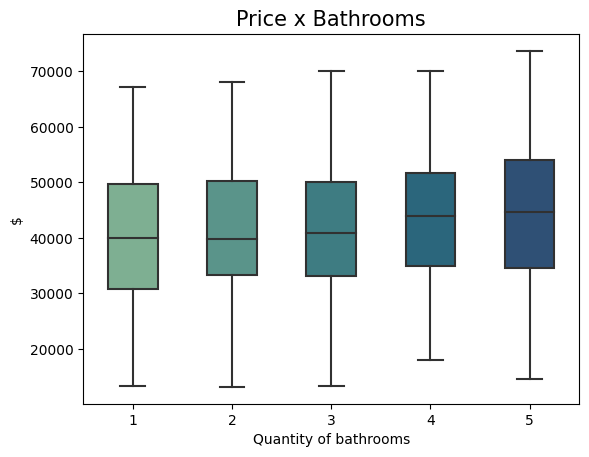

In [16]:
ax = sns.boxplot(data, x='bathroom', y='price', width=0.5, palette='crest')
ax.set_title('Price x Bathrooms', fontsize=15)
ax.set_xlabel('Quantity of bathrooms')
ax.set_ylabel('$')

Same as garages behavior the number of bathrooms doesn't seem to affect much the house's prices. Only houses with 4 and 5 bathrooms present a price average little higher than the houses with 1, 2 or 3 bathrooms. 

This explains a little higher, but still low and positive, correlation (0.12) comparing to the previous one (garage = 0.10).

### Box-plot (Price X Fireplace)

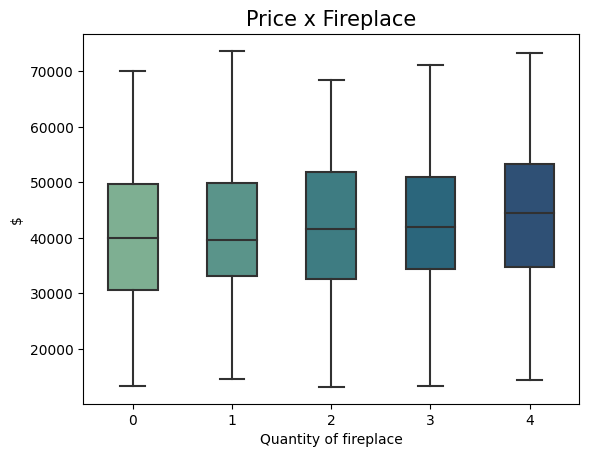

In [17]:
ax = sns.boxplot(data, x='fireplace', y='price', width=0.5, palette='crest')
ax.set_title('Price x Fireplace', fontsize=15)
ax.set_xlabel('Quantity of fireplace')
ax.set_ylabel('$')
ax = ax

Same as the number of bathrooms, the number of fireplaces doesn't present any big influence towards the house prices. There is a little tendency with higher quantities to higher prices.

The correlation is positive and low as well (i.e. 0.11), as presented before.

### Box-plot (Preço X Marble)

Text(0, 0.5, '$')

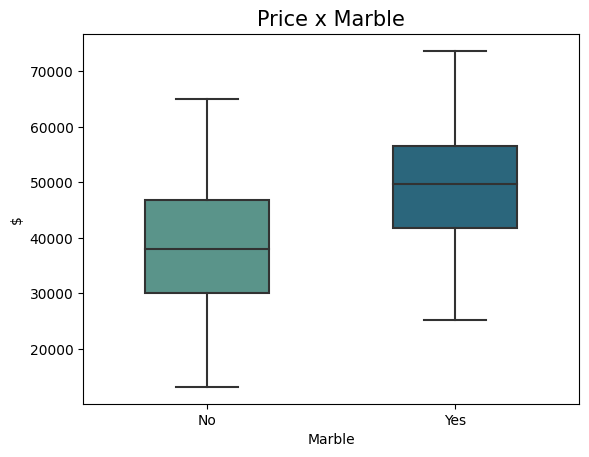

In [18]:
ax = sns.boxplot(data, x='marble', y='price', width=0.5, palette='crest')
ax.set_title('Price x Marble', fontsize=15)
ax.set_xlabel('Marble')
ax.set_xticklabels(('No', 'Yes'))
ax.set_ylabel('$')

As opposed to previously presented graphs, the fact there is marble finishing in the houses has effects on house prices. The houses with marble finishing presents higher price tendency.

As for Pearson's correlation, the Marble presents a correlation of 0.43, higher than the previously presented ones and positive.

### Box-plot (Prices X Floors)

[Text(0, 0, 'Only one floor'), Text(1, 0, 'More than one floor')]

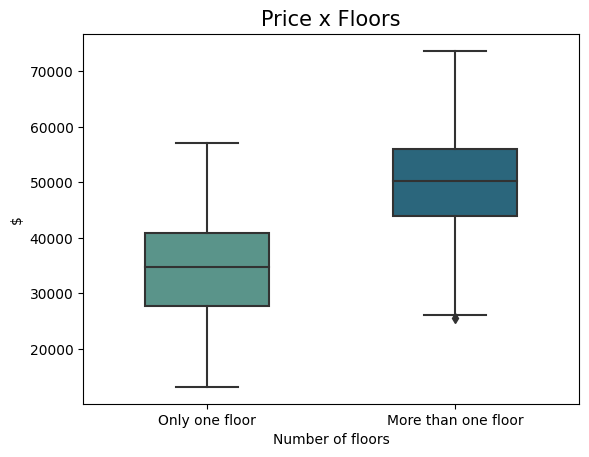

In [19]:
ax = sns.boxplot(data, x='floors', y='price', width=0.5, palette='crest')
ax.set_title('Price x Floors', fontsize=15)
ax.set_xlabel('Number of floors')
ax.set_ylabel('$')
ax.set_xticklabels(('Only one floor', 'More than one floor'))

The fact that the house has more than one floor shows higher prices tendency.

As far as it concerns to correlation between prices and floors (0.63), is the highest in this dataset.

There is an outlier in this graph which could affect this linear regression simulation, so I will be doing further investigation as follows.

In [20]:
data.query('floors == 1 and price < 28000').sort_values('price')

,price,area,garage,bathroom,fireplace,marble,floors
85,25625,35,2,1,1,0,1
696,26025,81,2,1,0,0,1
405,26825,13,2,3,0,0,1
373,26850,64,2,1,2,0,1
403,27500,50,1,3,0,0,1
436,27700,28,1,4,1,0,1


Just by looking on the graph I could estimate that the outliers price are below 28k. But it doesn't guarantee it, so I'm doing further analysis to find out what are these outliers.

In [21]:
data.query('floors == 1').describe()

,price,area,garage,bathroom,fireplace,marble,floors
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.0
mean,49882.216495,122.983505,1.991753,2.973196,2.028866,0.327835,1.0
std,9427.430906,71.346638,0.815611,1.411765,1.408061,0.469909,0.0
min,25625.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,43850.000000,63.000000,1.000000,2.000000,1.000000,0.000000,1.0
50%,50200.000000,121.000000,2.000000,3.000000,2.000000,0.000000,1.0
75%,55975.000000,185.000000,3.000000,4.000000,3.000000,1.000000,1.0
max,73675.000000,248.000000,3.000000,5.000000,4.000000,1.000000,1.0


In [22]:
price_more_floors = data.query('floors == 1')[['price', 'floors']]
price_more_floors

,price,floors
0,51875,1
3,38575,1
4,33775,1
10,57075,1
11,38750,1
...,...,...
991,46125,1
994,46600,1
996,43550,1
997,56575,1


In [23]:
price_more_floors.groupby('floors').count()

,price
floors,
1,485


After filtering the data by houses with more than one floor, I will be using Z-score calculation method (raw score of each line's distance from the mean) to identify the outliers.

In [24]:
z_score = stats.zscore(price_more_floors['price']).round(3)
z_score.head()

0     0.212
3    -1.201
4    -1.710
10    0.764
11   -1.182
Name: price, dtype: float64

In [25]:
z_score.count()

485

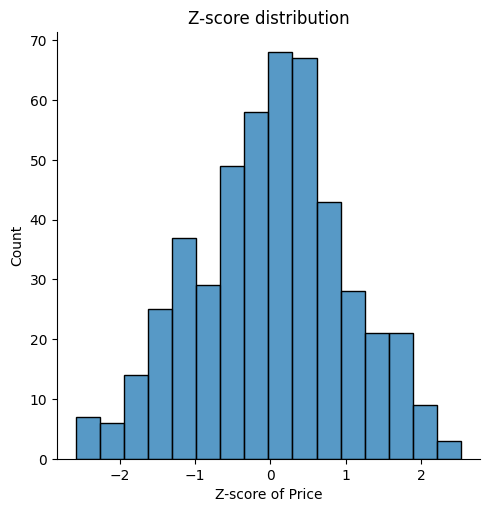

In [26]:
ax = sns.displot(z_score)
ax.set(title='Z-score distribution', xlabel='Z-score of Price')

As seen on the Distribution plot above, we can see it follows a normal distribution where on the negative side, there is a quantity of outliers to the left of -2.

In [27]:
z_score.where(z_score < -2.4).dropna()

85    -2.576
373   -2.446
405   -2.448
696   -2.533
Name: price, dtype: float64

In [28]:
index_list = z_score.where(z_score < -2.4).dropna().index
index_list

Int64Index([85, 373, 405, 696], dtype='int64')

In [29]:
data.iloc[index_list].sort_values('price')

,price,area,garage,bathroom,fireplace,marble,floors
85,25625,35,2,1,1,0,1
696,26025,81,2,1,0,0,1
405,26825,13,2,3,0,0,1
373,26850,64,2,1,2,0,1


In [30]:
data_excl_outliers = data.drop(index_list)
data_excl_outliers.head()

,price,area,garage,bathroom,fireplace,marble,floors
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


After excluding the outliers, I will be plotting the box plot again to see if the outlier is actually excluded from this analysis.

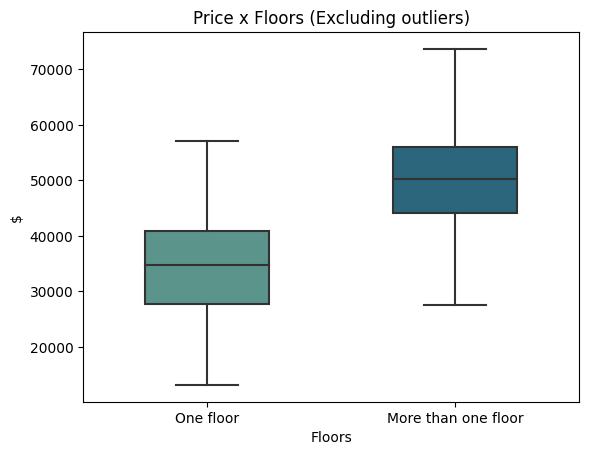

In [31]:
ax = sns.boxplot(data_excl_outliers, x='floors', y='price', width=0.5, palette='crest')
ax.set_title('Price x Floors (Excluding outliers)')
ax.set_xlabel('Floors')
ax.set_xticklabels(('One floor', 'More than one floor'))
ax.set_ylabel('$')
ax = ax

As seen in box plot above, the outliers are now out of the dataset so it reduces the noise on the linear regresion calculation.

## Frequency distribution of *dependent* variable (y)



https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

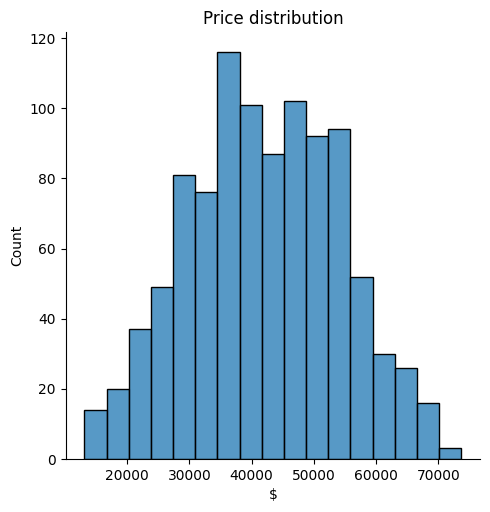

In [32]:
ax = sns.displot(data_excl_outliers.price)
ax.set(title='Price distribution', xlabel='$')
ax = ax

In [33]:
stats.normaltest(data_excl_outliers.price)

NormaltestResult(statistic=25.455780315252355, pvalue=2.9672049052154628e-06)

With the histogram we can see a normal distribution behavior. On the other hand, by testing the normal distribution on the price column, with statisc test high (25.46) and low p-value (2.97 e-06) we reject the null hypothesys, so the price column does not follow a normal distribution.

## Gráficos de dispersão entre as variáveis do dataset

## Pair plot with only dependent variable (y)


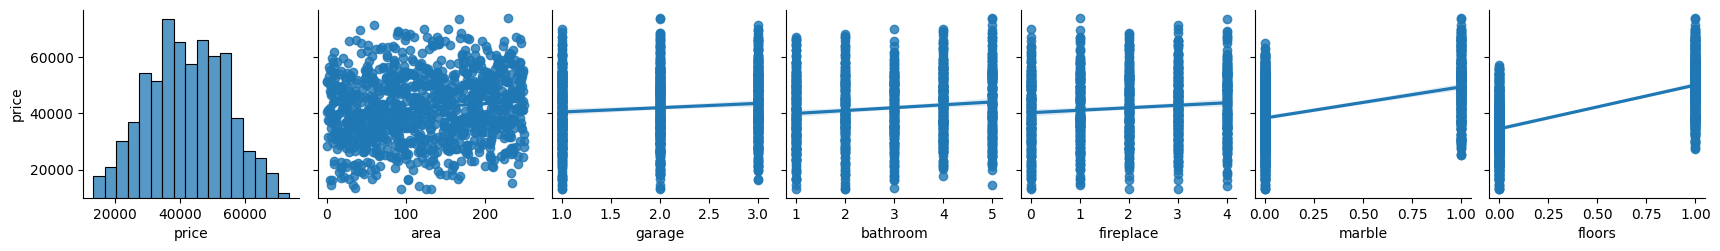

In [34]:
ax = sns.pairplot(data_excl_outliers, y_vars='price', kind='reg')

In [35]:
data.corr()

,price,area,garage,bathroom,fireplace,marble,floors
price,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garage,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
bathroom,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
fireplace,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marble,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
floors,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


As seen before, the strongest correlations between prices (ddependent) and marble and floors (explanatory) are the highest ones as presented on the correlation matrix and on the pairplot above.

# Estimating a Linear Regression model

## Creating a series of dependent variable (y) - Price

In [36]:
y = pd.Series(data_excl_outliers.price)
y

0      51875
1      17875
2      47075
3      38575
4      33775
       ...  
995    29150
996    43550
997    56575
998    56075
999    13350
Name: price, Length: 996, dtype: int64

## Creating a DataFrame with expalanatory variable (x) - Floor and Marble

In [37]:
data_excl_outliers.columns

Index(['price', 'area', 'garage', 'bathroom', 'fireplace', 'marble', 'floors'], dtype='object')

In [38]:
X = pd.DataFrame(data_excl_outliers[['area', 'garage', 'bathroom', 'fireplace', 'marble', 'floors']])
X

,area,garage,bathroom,fireplace,marble,floors
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1
...,...,...,...,...,...,...
995,48,1,5,4,0,0
996,112,2,2,3,0,1
997,185,3,4,4,0,1
998,185,2,3,1,0,1


## Creating test and train datasets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [40]:
print(f'X_train = {len(X_train)}, X_test = {len(X_test)}, Total {len(X_train) + len(X_test)}')
print(f'y_train = {len(y_train)}, y_test = {len(y_test)}, Total {len(y_train) + len(y_test)}')

X_train = 697, X_test = 299, Total 996
y_train = 697, y_test = 299, Total 996


## Instatiating a *LinearRegression()* class

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

## Testing the estimation model with the coefficient of determination (R²) with training data

In [43]:
model.score(X_train, y_train)

0.650167014921819

The coefficient of determination (R²) measures how well a statistics model can predict an outcome. It usually is from 0 to 1, and the closest to 1 is better. 

In this model, it reached a coefficient of determination of 0.65. 

## Predicting values with *predict()* function

In [44]:
y_prediction = model.predict(X_test)

## Calculating the coefficient of determination (R²) with our model's predictions

In [45]:
metrics.r2_score(y_test, y_prediction)

0.65309957298387

Same as calculated before, the coefficient is the same usig the test data.

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [46]:
test = X_test[0:1]
test

,area,garage,bathroom,fireplace,marble,floors
815,50,2,3,2,0,1


In [47]:
model.predict(test)

array([44672.64178436])

In [48]:
data_excl_outliers.query('area == 50 & garage == 2 & floors == 1')

,price,area,garage,bathroom,fireplace,marble,floors
126,52750,50,2,3,2,0,1
815,55200,50,2,3,2,0,1


## Calculating the intercept and coefficients of the model

In [49]:
model.intercept_

19695.573612142485

In [50]:
model.coef_

array([   23.28480225,  1508.57562751,  1255.04795352,   773.76225711,
       10716.55860142, 15483.0084297 ])

In [51]:
X.columns

Index(['area', 'garage', 'bathroom', 'fireplace', 'marble', 'floors'], dtype='object')

In [52]:
index_name = ['Intercept', 'Area', 'Garage', 'Bathroom', 'Fireplace', 'Marble', 'Floors']

df_intercept_coef = pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index_name, columns=['Parameters']).round(2)
df_intercept_coef

,Parameters
Intercept,19695.57
Area,23.28
Garage,1508.58
Bathroom,1255.05
Fireplace,773.76
Marble,10716.56
Floors,15483.01


## Regression test

In [53]:
y_train_predict = model.predict(X_train)

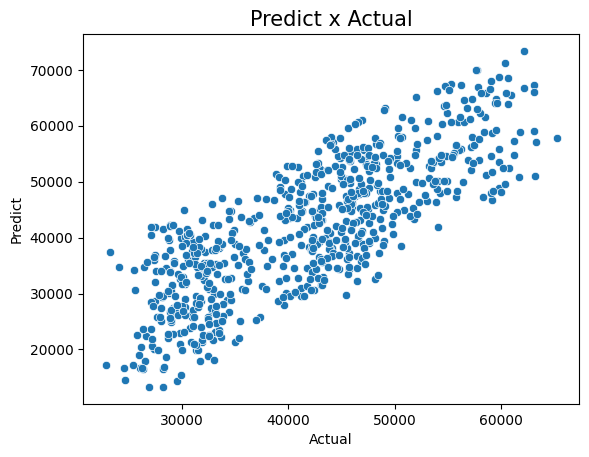

In [54]:
ax = sns.scatterplot(x=y_train_predict, y=y_train)
ax.set_title('Predict x Actual', fontsize=15)
ax.set_xlabel('Actual')
ax.set_ylabel('Predict')
ax = ax

## Residual analysis

In [55]:
residual = y_train_predict - y_train

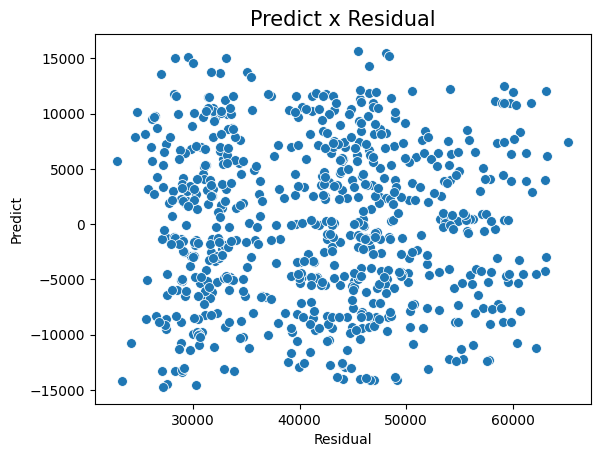

In [56]:
ax = sns.scatterplot(x=y_train_predict, y=residual, s=50)
ax.set_title('Predict x Residual', fontsize=15)
ax.set_xlabel('Residual')
ax.set_ylabel('Predict')
ax = ax

In [57]:
print(residual.mean())
print(residual.sum())

-4.279975067166721e-12
-2.9831426218152046e-09


By summing up or getting the average of the residuals, we have a value very close to 0, which indicates a good model. 

# Saving and loading the estimation model

## Importing pickle library

In [58]:
import pickle

## Saving estimation model

In [59]:
output = open('house_price_predict', 'wb')
pickle.dump(model, output)
output.close()

The output on a new notebook.

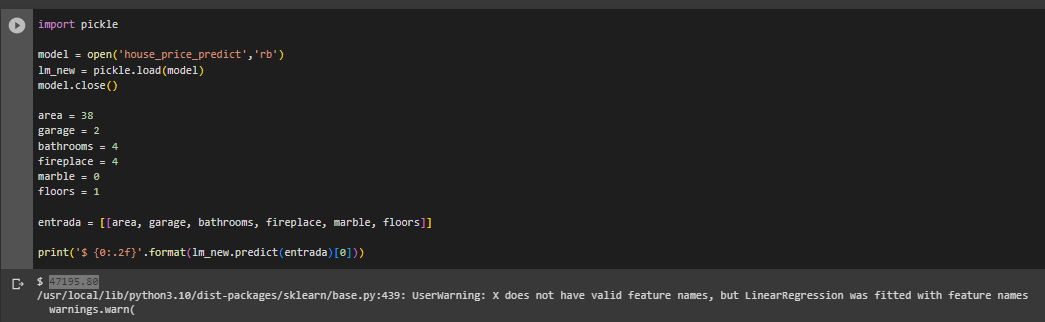